In [1]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
# Preprocessing Input data
data = pd.read_csv('Business_Dynamics_Statistics.csv')
X = data.iloc[:, 7]
print(X)
Y = data.iloc[:, 14]
print(Y)

0      19.607
1      16.967
2       8.067
3      22.155
4      11.437
        ...  
812     9.887
813     8.281
814    12.747
815     9.526
816     7.641
Name: estabs_entry_rate, Length: 817, dtype: float64
0      32.116
1      24.285
2      12.788
3      35.345
4      14.485
        ...  
812     7.799
813    10.100
814    12.913
815    13.374
816    11.318
Name: job_creation_rate, Length: 817, dtype: float64


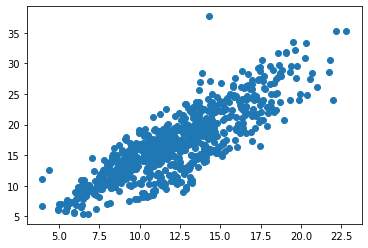

In [4]:
plt.scatter(X, Y)
plt.show()

In [5]:
# Building the model
coef = 0
cons = 0

L = 0.0001  # The learning Rate
epochs = 400  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

coef_list = []
cons_list = []
# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = coef*X + cons  # The current predicted value of Y
    D_coef = (-2/n) * sum(X * (Y - Y_pred))  
    D_cons = (-2/n) * sum(Y - Y_pred)  
    coef = coef - L * D_coef  # Update coef
    cons = cons - L * D_cons  # Update constant
    coef_list.append(coef)
    cons_list.append(cons)
    
print (coef, cons)

1.3833565562639265 0.10816094403416071


Text(0.5, 1.0, 'Gradient Descent')

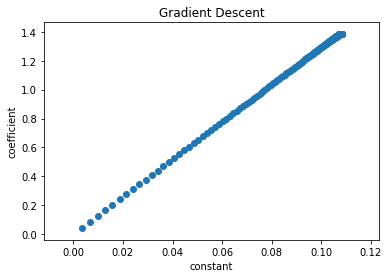

In [6]:
plt.scatter(cons_list, coef_list)
plt.xlabel('constant')
plt.ylabel('coefficient')
plt.title('Gradient Descent')

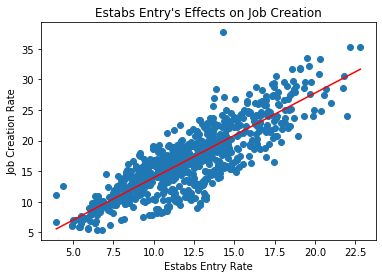

The prediction formula is Y=1.383*X+0.108


In [7]:
# Making predictions
Y_pred = coef*X + cons

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.xlabel('Estabs Entry Rate')
plt.ylabel('Job Creation Rate')
plt.title("Estabs Entry's Effects on Job Creation")
plt.show()
print('The prediction formula is Y=' + str(round(coef, 3)) + '*X+' + str(round(cons, 3)))

In [37]:
test = pd.concat([X, Y], axis=1).sample(500)
train = pd.concat([X, Y], axis=1).sample(500)

test_X = test.iloc[:,0]
test_Y = test.iloc[:,1]

train_X = train.iloc[:,0]
train_Y = train.iloc[:,1]

In [40]:
def gradient_descent(X, Y):
    # Building the model
    coef = 0
    cons = 0

    L = 0.0001  # The learning Rate
    epochs = 400  # The number of iterations to perform gradient descent

    n = float(len(X)) # Number of elements in X

    coef_list = []
    cons_list = []
    # Performing Gradient Descent 
    for i in range(epochs): 
        Y_pred = coef*X + cons  # The current predicted value of Y
        D_coef = (-2/n) * sum(X * (Y - Y_pred))  
        D_cons = (-2/n) * sum(Y - Y_pred)  
        coef = coef - L * D_coef  # Update coef
        cons = cons - L * D_cons  # Update constant
        coef_list.append(coef)
        cons_list.append(cons)

    # Making predictions
    Y_pred = coef*X + cons

    plt.scatter(X, Y) 
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
    plt.xlabel('Estabs Entry Rate')
    plt.ylabel('Job Creation Rate')
    plt.title("Estabs Entry's Effects on Job Creation")
    plt.show()
    print('The prediction formula is Y=' + str(round(coef, 3)) + '*X+' + str(round(cons, 3)))
    return coef, cons

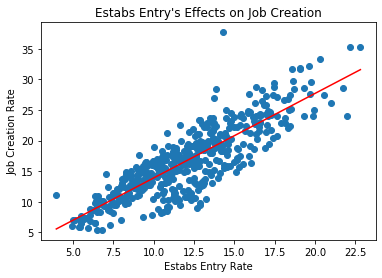

The prediction formula is Y=1.38*X+0.105


(1.380250587006472, 0.10509903104640637)

In [41]:
gradient_descent(train_X, train_Y)

In [43]:
prediction_Y = test_X*1.38 + 0.105

In [45]:
prediction_Y
test_Y

4      14.485
522    16.152
749    13.728
42     11.796
382    10.106
        ...  
292    15.863
224    14.191
72     15.135
632    13.825
512    14.336
Name: job_creation_rate, Length: 500, dtype: float64

In [50]:
# TODO: Calculate the *test* R-squared value (using sklearn's r2_score function)
from sklearn.metrics import r2_score
rsquared_val = r2_score(test_Y, prediction_Y)
print(rsquared_val)

0.7115383910759963
